## Função do Segundo Grau

Vamos agora realizar um experimento nos mesmos dados que usamos anteriormente. O objetivo será plotar uma curva do segundo grau, em outras palavras, uma curva do tipo $y = ax^2 + bx + c$.

A dificuldade agora é que temos três parâmetros livres que precisamos descobrir: $a$, $b$ e $c$. Em outras palavras, no seu código, você precisará de três loops encadeados. Perceba que este nosso método de encontrar oráculos é proibitivo quando o número de parâmetros aumenta. Entretanto, veja se você consegue obter os melhores valores de $a$, $b$ e $c$.

Primeiramente, vamos colocar no notebook as funções que você precisará

In [ ]:
## Obtendo os dados
import pandas as pd
import numpy as np

faithful = pd.read_csv("faithful.csv", index_col = 0)
faithful.head()

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


In [ ]:
# Função que computa o erro do oráculo
def erro_quadratico_acumulado(oraculo) :
    # Obtendo as observações de erupção e espera
    # do old faithful geyzer
    pontos_y = faithful.eruptions.values
    pontos_x = faithful.waiting.values

    # Vamos concatenar os quadrados das distâncias
    # entre a espera real e a predita
    erro = 0
    for i in range(len(pontos_x)) :
        # Usando o oráculo para obter a predição.
        # Posteriormente, chamaremos isso de
        # passo forward.
        predicted = oraculo(pontos_x[i])

        # O erro é o quadrado da diferença entre
        # o que foi predito e o que estava no
        # banco de dados
        erro += (predicted - pontos_y[i])**2

    return erro

In [ ]:
# Função que cria um gráfico do oráculo
import matplotlib.pyplot as plt
def plota_grafico(oraculo, with_error = False) :
    ## Plotando os pontos do banco de dados
    faithful.plot.scatter(x='waiting',
                          y='eruptions')

    ## Criando um eixo X para plotar a reta
    eixo_x = range(40,100,2)
    eixo_y = []

    ## Gerando a resposta do oráculo
    for x in eixo_x :
        eixo_y.append(oraculo(x))

    ## Plotando a reta
    plt.plot(eixo_x, eixo_y, 'r--', label='Valores Obtidos')

    if (with_error) :

        ## Colocando barras verticais para evidenciar erros
        ## do oráculo
        pontos_y = faithful.eruptions.values
        pontos_x = faithful.waiting.values
        for i in range(len(pontos_x)) :
            predicted = oraculo(pontos_x[i])
            plt.plot(
                (pontos_x[i], pontos_x[i]),
                (predicted, pontos_y[i]),
                '-', c = "black"
            )

Agora começa o seu trabalho, você deverá criar uma função que indique o valor do erro para um grupo de $a$, $b$ e $c$. Esta função é muito semelhante ao que foi visto em sala de aula, mas agora para três parâmetros.

In [ ]:
iter_a = 200
min_a = -5
max_a = 5

iter_b = 200
min_b = -5
max_b = 5

iter_c= 200
min_c = -5
max_c = 5


In [ ]:
def erro_quadratico_variando_a_b_c() :
    # Listas a serem retornadas.
    eixo_a = []
    eixo_b = []
    eixo_c = []
    eixo_erro = []

    # ToDo: Configure os mínimos e máximos de
    # a, b e c na sua busca

    for i in range(iter_a) :
        a = min_a + i * (max_a - min_a)/iter_a

        for j in range(iter_b) :
            b = min_b + j * (max_b - min_b)/iter_b

            for k in range(iter_c) :
                c = min_c + k * (max_c - min_c)/iter_c

                eixo_a.append(a)
                eixo_b.append(b)
                eixo_c.append(c)

                ## ToDo: crie o oráculo com os valores de a, b e c.
                oraculo = lambda x : a*(x*x) + b*x +c

                eixo_erro.append(erro_quadratico_acumulado(oraculo))

    return eixo_a, eixo_b, eixo_c, eixo_erro


In [ ]:
import pandas as pd
import numpy as np

def erro2_quadratico_variando_a_b_c() :

  a = min_a + np.arange(iter_a) * (max_a - min_a)/iter_a
  b = min_b + np.arange(iter_b) * (max_b - min_b)/iter_b
  b = np.tile(b, iter_a)
  c = min_c + np.arange(iter_c) * (max_c - min_c)/iter_c
  c = np.tile(c, iter_b*iter_a)

  eixo_a = np.repeat(a,iter_b*iter_c)
  eixo_b = np.repeat(b,iter_c)
  eixo_c = c


  oraculo = lambda x : eixo_a*(x*x) + eixo_b*x +eixo_c
  eixo_erro =erro_quadratico_acumulado(oraculo)

  return eixo_a, eixo_b, eixo_c, eixo_erro


In [ ]:
import time

start = time.time()

eixo_a, eixo_b, eixo_c, eixo_erro = erro2_quadratico_variando_a_b_c()

print(str(time.time()- start) + " seconds")


#print(np.allclose(a,b))

27.97288990020752 seconds


O próximo passo é econtrar os valores que minimizam o erro.

In [ ]:



minindex = np.argmin(eixo_erro)
erro_minimo = eixo_erro[minindex]
a_minimo = eixo_a[minindex]
b_minimo = eixo_b[minindex]
c_minimo = eixo_c[minindex]



## ToDo: pesquise pelo vetor eixo_erro qual o erro mínimo e
## coloque na variável erro_minimo.

## ToDo: encontre os valores de a, b e c que geram o erro mímimo e
## armazene nas variáveis a_minimo, b_minimo e c_minimo
print(erro_minimo, a_minimo, b_minimo, c_minimo)

96.3143749999991 0.0 0.09999999999999964 -3.6


Agora plote a curva que você encontrou em um gráfico. Em outras palavras, crie o quinto oráculo com os valores encontrados por você.

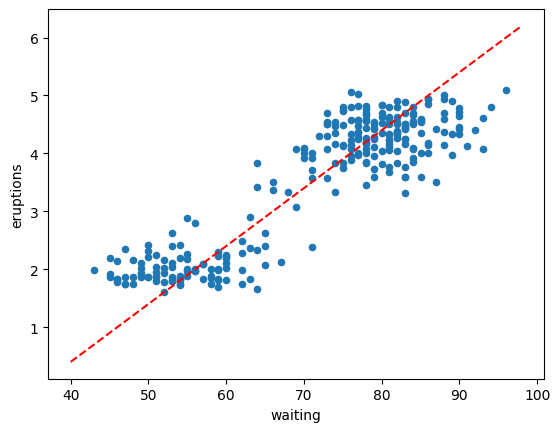

In [ ]:
## ToDo: retorne os menores valores de a, b e c
def quinto_oraculo(x) :
    return a_minimo*(x*x) + b_minimo*x +c_minimo

plota_grafico(quinto_oraculo)